In [1085]:
import numpy as np
import pandas as pd
import seaborn as sns

from mpmath import *
from sympy import *
from numpy import linalg as LA
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
%matplotlib inline

In [1086]:
normalization = 255

In [1087]:
def plot_J(J_history):
    x = np.arange(0, len(J_history))
    plt.plot(x, J_history)
    plt.show()

In [1088]:
def normalize(X):
    return X / normalization

In [1089]:
def denormalize(X):
    return X * normalization

In [1090]:
def show_samples(X, nrows=5, ncols=5, rsize=5, csize=5):
    fig, ax = plt.subplots(nrows=nrows, ncols=ncols, sharex='col', sharey='row', 
                           gridspec_kw={'hspace': -0.02, 'wspace': -0.02}, figsize=(rsize, csize))

    counter=0
    for row in ax:
        for col in row:
            col.imshow(X[counter], 'gray')
            col.axis('off')
            counter += 1
    plt.show()

In [1091]:
def get_images_path(img_dir):
    """
    returns array with images path
    """
    image_full_names = []    
    image_names = listdir(img_dir)
    for image_name in image_names:
        image_full_names.append(img_dir + image_name)
    return image_full_names

In [1092]:
def resize_images(images_path, width):
    """
    resize all images in the dataset for processing in format:
    N x M x 3  
    Width x Length x RGB
    """
    imported_images = []
    for image_path in images_path:
        foo = cv2.imread(image_path)
        foo = cv2.resize(foo, (image_width, width))
        imported_images.append(foo)
    return imported_images

In [1093]:
def process_image(image, width):
    """
    returns image as an array of features
    """
    out = []
    for x in range(width):
        for y in range(width):
            for z in range(3): #account for RGB
                out.append(image[x][y][z])
    return np.asarray(out)

In [1094]:
def precess_images(images, width):
    """
    returns numpy array of processed images
    """
    return np.array([process_image(image, width = width) for image in images])

In [1095]:
# #https://www.kaggle.com/alexattia/the-simpsons-characters-dataset
# base_dir = "./the-simpsons-characters-dataset/simpsons_dataset/"
# bart_dir = f"{base_dir}bart_simpson/"
# homer_dir = f"{base_dir}simpsons_dataset/homer_simpson/"
# image_width = 115
# imgs_path_bart = get_images_path(bart_dir)
# imgs_path_homer = get_images_path(homer_dir)

In [1096]:
def scale(img, n_rows, n_cols):
    n_rows0 = img.shape[0] # source number of rows 
    n_cols0 = img.shape[1] # source number of columns
    new_img = np.zeros((n_rows, n_cols))
#     for r in range(n_rows):
#         for c in range(n_cols):
#             new_img[r, c] = img[int(n_rows0 * r / n_rows)][int(n_cols0 * c / n_cols)]
    
    r_idxs = (n_rows0 * np.arange(n_rows) / n_rows).astype(int)
    c_idxs = (n_cols0 * np.arange(n_cols) / n_cols).astype(int)
    for i, r_idx in enumerate(r_idxs):
        for j, c_idx in enumerate(c_idxs):
            new_img[i][j] = img[r_idx][c_idx]

    return new_img



In [1097]:
def random_resize_pad(X, res_min=1, res_max=1, pad_min=1, pad_max=1):
    X_new = np.zeros(X.shape)
    
    for idx, x in enumerate(X):
        default_w, default_h = (28, 28)
        
        w, h = np.random.choice([-8, -7, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8], 2)
        p_t, p_b, p_l, p_r = np.random.choice([0, 1, 2], 4)

        x_scaled = scale(x, default_w + w, default_h + h)
        x_scaled_padded = np.pad(x_scaled, ((p_t, p_b), (p_l, p_r)), 'constant')
        x_normal = scale(x_scaled_padded, default_w, default_h)
        
        X_new[idx] = x_normal
    
    return X_new

In [1098]:
filename_test = "./data/digit-recognizer/test.csv"
filename_train = "./data/digit-recognizer/train.csv"

df_train = pd.read_csv(filename_train, delimiter=',')
df_test = pd.read_csv(filename_test, delimiter=',')

X = df_train.loc[:, df_train.columns != "label"]
y = df_train.loc[:, df_train.columns == "label"]
print('Dataset: X={}, y={}'.format(X.shape, y.shape))

Dataset: X=(42000, 784), y=(42000, 1)


In [1099]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle = True, stratify = y)

print('Training set: X={}, y={}'.format(X_train.shape, y_train.shape))
print('Test set: X={}, y={}'.format(X_test.shape, y_test.shape))

Training set: X=(33600, 784), y=(33600, 1)
Test set: X=(8400, 784), y=(8400, 1)


In [1100]:
%%time
X_train_rand = random_resize_pad(X_train.to_numpy().reshape(-1, 28,28)).reshape(-1, 784)
X_test_rand = random_resize_pad(X_test.to_numpy().reshape(-1, 28,28)).reshape(-1, 784)
#X_mod.shape

#mod_pred = lg.predict(normalize(X_mod))

#ccuracy_score(mod_pred, y_test)

Wall time: 1min 6s


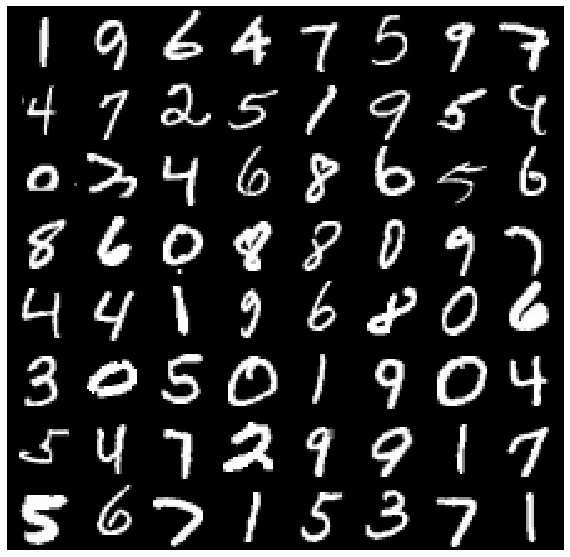

In [1101]:
X_show = X_train.to_numpy().reshape(-1,28,28)
show_samples(X_show, nrows=8, ncols=8, rsize=10, csize=10)

In [1102]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
encoder.fit(y_train)

Y_train = encoder.transform(y_train).toarray()
y_labels = [x[3:] for x in  encoder.get_feature_names()]

# encoder.fit(y_test)
# Y_test = encoder.transform(y_test).toarray()

0 iteration: 98.68221827117335
100 iteration: 26.26600973052296
200 iteration: 24.0943491041388
300 iteration: 23.126205838095263
400 iteration: 22.547848427234


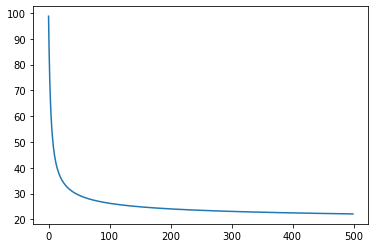

22.156057681520306
Wall time: 33.9 s


In [1103]:
%%time
from LogisticRegression import CustomLogisticRegression
lg = CustomLogisticRegression(normalize=False)
lg.fit(normalize(X_train_rand), Y_train, 0.5, 500, 1e-15)

plot_J(lg.get_cost_history())
print(lg.get_cost_history()[-1])

In [1104]:
y_pred = lg.predict(normalize(X_test_rand))
y_pred

array([6, 2, 4, ..., 0, 9, 4])

In [1105]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred, y_test)

0.8533333333333334

In [1106]:
from matplotlib import rc
def show_adversarial_sample(x, y_labels, true_class=[], model=None, attack_model=None, max_norm=10, max_iters=10):

    x_normalized = normalize(x)
    attack = attack_model()

    if type(attack).__name__ in ['AttackNoise']:
        x_adv_normalized = attack.attack(x_normalized, true_class, model.predict, max_norm=max_norm)
    
    elif type(attack).__name__ in ['AttackIFGSM', 'AttackTIFGSM', 'AttackFGSM', 'AttackDeepFool', 'AttackMIFGSM']:
        x_adv_normalized = attack.attack(x_normalized, model.W, model.b, true_class, model.predict, max_norm=max_norm)
    
    elif type(attack).__name__ in ['AttackMIFGSM']:
        x_adv_normalized = attack.attack(x_normalized, model.W, model.b, true_class, model.predict, max_norm=max_norm, momentum=0.1)
        
    x_adv = denormalize(x_adv_normalized)
    x_adv_pred = model.predict(np.array(x_adv_normalized))
    
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, squeeze=True, sharex=True, sharey=True)
    fig.set_size_inches(15,5)
    fig.suptitle('Adversarial example')
    
    ax1.imshow(x.reshape(28,28), 'gray')
    ax1.set_title(f"Original\n prediction: {model.predict(x_normalized)[0]}")
    
    ax2.imshow(x.reshape(28,28) - x_adv.reshape(28,28), "gray")
    ax2.set_title(f"Difference")
    
    ax3.imshow(x_adv.reshape(28,28), 'gray')
    ax3.set_title(f"Adversarial\n prediction: {x_adv_pred[0]}")
    plt.show()

    pred_with_labels = model.predict_by_labels(np.array(x_adv_normalized), y_labels)
    plt.bar(pred_with_labels[0].keys(), pred_with_labels[0].values())
    plt.show()
    
    print(f"Norm_inf: {LA.norm(abs(x_normalized - x_adv_normalized), np.inf)}; Result: {attack.tricked}")
    print(f"Max value: {max(max(x_adv))}")
    print(f"Min value: {min(min(x_adv))}")

In [1107]:
def untargeted_attack_benchmark(X, y_labels, model=None, attack_model=None, samples=100):
    X_norm = normalize(X)
    iter_res_dict = {}

    norms_range = np.linspace(0, 0.5, num=25)
    #print(f"Perturbations list: {norms_range}")

    for i in range(samples):
        x_normalized = np.expand_dims(X_norm[i, :], axis=0)
        y = np.zeros(len(y_labels))
        true_class_pos = model.predict(x_normalized)
        y[true_class_pos] = 1
    
        for norm in norms_range:
            attack = attack_model()
            if type(attack).__name__ in ['AttackNoise']:
                a = attack.attack(x_normalized, y, model.predict, max_norm=norm)
            elif type(attack).__name__ in ['AttackIFGSM', 'AttackTIFGSM', 'AttackDeepFool', 'AttackFGSM']:
                a = attack.attack(x_normalized, model.W, model.b, y, model.predict, max_norm=norm)
            
            elif type(attack).__name__ in ['AttackMIFGSM']:
                x_adv_normalized = attack.attack(x_normalized, model.W, model.b, y, model.predict, max_norm=norm, momentum=0.95)
        
            success = attack.tricked
            
            if norm in iter_res_dict.keys():
                iter_res_dict[norm]["appearance_count"] += 1
                iter_res_dict[norm]["success_count"] += success
            else:
                iter_res_dict.update({norm: {"appearance_count": 1, "success_count": success} })

    success_rate = {}
    for key, value in iter_res_dict.items():
        success_rate[key] = value["success_count"] / value["appearance_count"] * 100

    perturbations_list = [x[0] for x in sorted(success_rate.items(), key=lambda x: x[0]) ]
    successrate_list = [x[1] for x in sorted(success_rate.items(), key=lambda x: x[0]) ]

    plt.plot(perturbations_list, successrate_list)    
    return perturbations_list, successrate_list, type(attack).__name__

In [1108]:
correct_pred_idx = np.array(y_test.iloc[:, 0]) == y_pred
#correct_pred_idx_rand = np.array(y_test.iloc[:, 0]) == mod_pred
X_test_correct = X_test_rand[correct_pred_idx]
#X_test_correct_rand = X_test[correct_pred_idx_rand].to_numpy()

In [1109]:
from attacks import AttackFGSM
from attacks import AttackIFGSM
from attacks import AttackMIFGSM
from attacks import AttackTIFGSM
from attacks import AttackDeepFool
from attacks import AttackNoise

### Targeted FGSM Benchmark

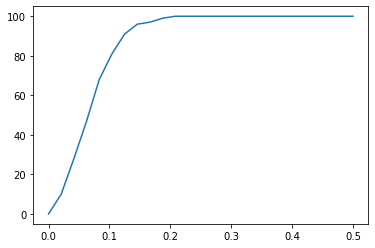

In [1110]:
x1, y1, label1 = untargeted_attack_benchmark(X_test_correct, y_labels, model=lg, attack_model=AttackIFGSM, samples=100)

In [1111]:
# x1_, y1_, label1 = untargeted_attack_benchmark(X_test_correct, y_labels, model=lg, attack_model=AttackIFGSM, samples=100)

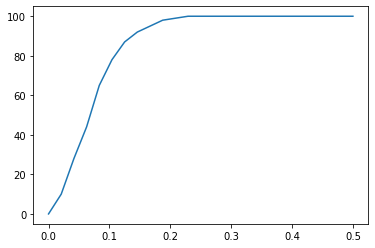

In [1112]:
x2, y2, label2 = untargeted_attack_benchmark(X_test_correct, y_labels, model=lg, attack_model=AttackFGSM, samples=100)


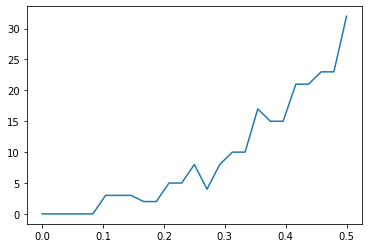

In [1113]:
x3, y3, label3 = untargeted_attack_benchmark(X_test_correct, y_labels, model=lg, attack_model=AttackNoise, samples=100)

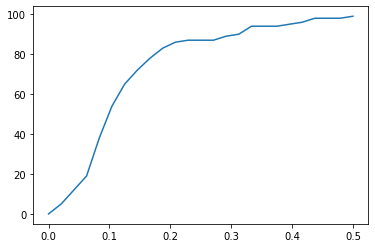

In [1114]:
x4, y4, label4 = untargeted_attack_benchmark(X_test_correct, y_labels, model=lg, attack_model=AttackDeepFool, samples=100)

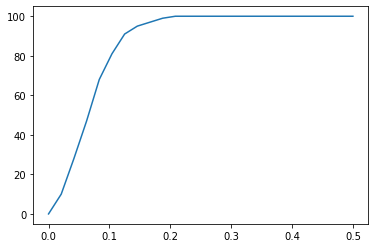

In [1115]:
x5, y5, label5 = untargeted_attack_benchmark(X_test_correct, y_labels, model=lg, attack_model=AttackMIFGSM, samples=100)

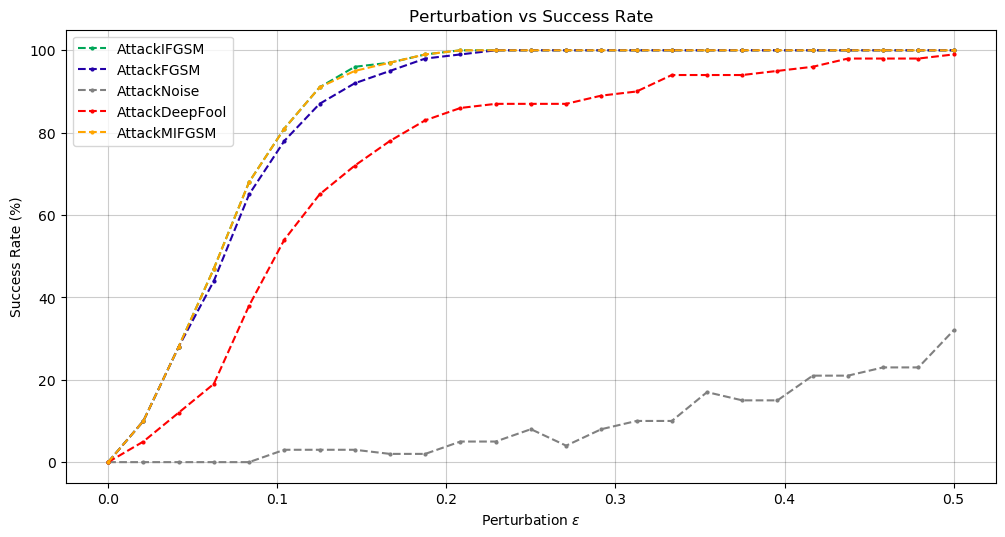

In [1116]:
from matplotlib.pyplot import figure

fig, ax = plt.subplots(num=None, figsize=(12, 6), dpi=100, facecolor='w')
plt.grid(which='major', linestyle='-', color='black', alpha=0.2)
ax.set_title('Perturbation vs Success Rate')
ax.set_xlabel(r"Perturbation $\epsilon$")
ax.set_ylabel('Success Rate (%)')

plt.plot(np.array(x1), y1, linestyle='--', marker='o', markersize=2, color='#00A658', label = label1)
plt.plot(np.array(x2), y2, linestyle='--', marker='o', markersize=2, color='#2300A8', label = label2)
plt.plot(np.array(x3), y3, linestyle='--', marker='o', markersize=2, color='grey', label = label3)
plt.plot(np.array(x4), y4, linestyle='--', marker='o', markersize=2, color='red', label = label4)
plt.plot(np.array(x5), y5, linestyle='--', marker='o', markersize=2, color='orange', label = label5)
plt.legend()

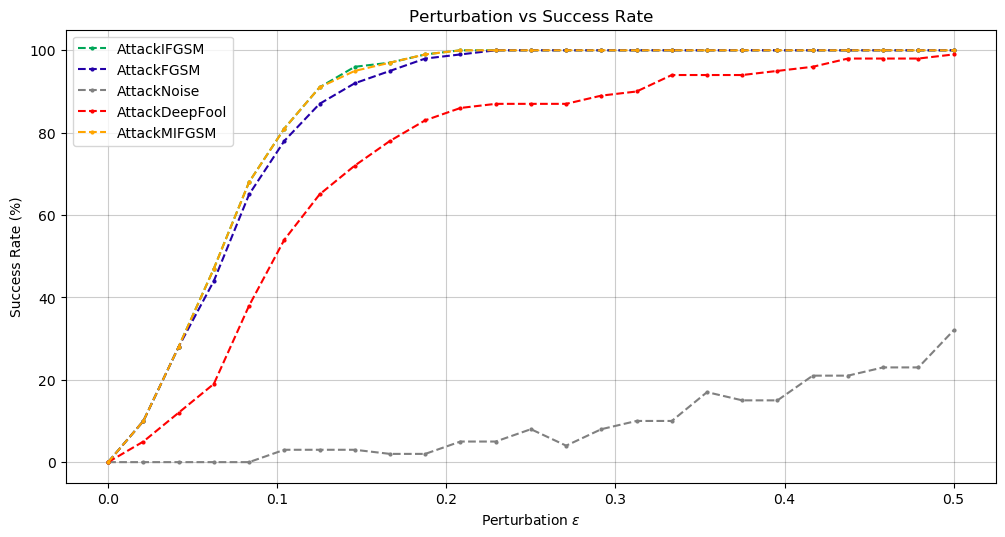

In [1117]:
from matplotlib.pyplot import figure

fig, ax = plt.subplots(num=None, figsize=(12, 6), dpi=100, facecolor='w')
plt.grid(which='major', linestyle='-', color='black', alpha=0.2)
ax.set_title('Perturbation vs Success Rate')
ax.set_xlabel(r"Perturbation $\epsilon$")
ax.set_ylabel('Success Rate (%)')

plt.plot(np.array(x1), y1, linestyle='--', marker='o', markersize=2, color='#00A658', label = label1)
plt.plot(np.array(x2), y2, linestyle='--', marker='o', markersize=2, color='#2300A8', label = label2)
plt.plot(np.array(x3), y3, linestyle='--', marker='o', markersize=2, color='grey', label = label3)
plt.plot(np.array(x4), y4, linestyle='--', marker='o', markersize=2, color='red', label = label4)
plt.plot(np.array(x5), y5, linestyle='--', marker='o', markersize=2, color='orange', label = label5)
plt.legend()

### Untargeted Noise Attack

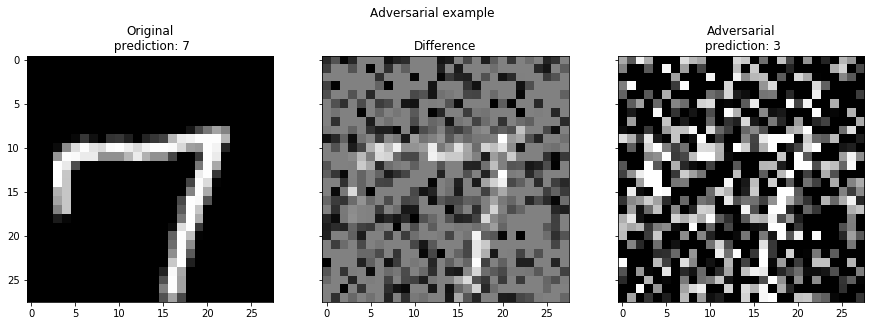

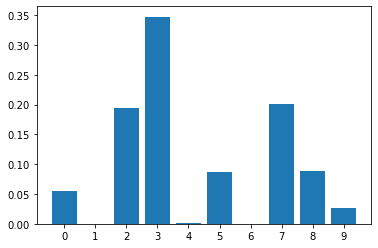

Norm_inf: 214.9688196803471; Result: True
Max value: 255.0
Min value: 0.0


In [1118]:
index = 38
x = np.expand_dims(X_test[correct_pred_idx].iloc[index, :], axis=0)
y = np.zeros(len(y_labels))

true_class = lg.predict(normalize(x))
y[true_class] = 1

show_adversarial_sample(x, y_labels, true_class=y, model=lg, attack_model=AttackNoise, max_norm=1)

### Untargeted FGSM

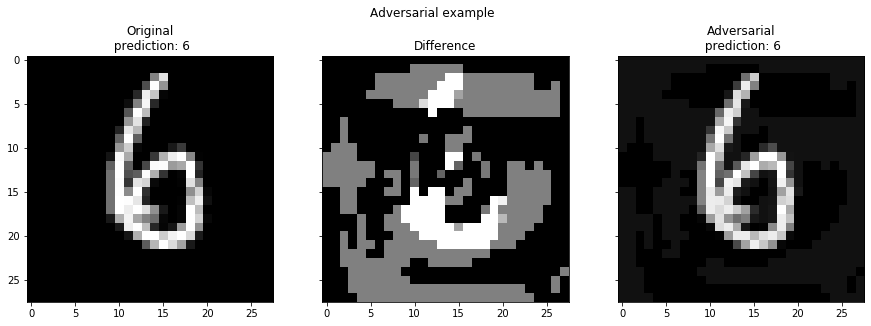

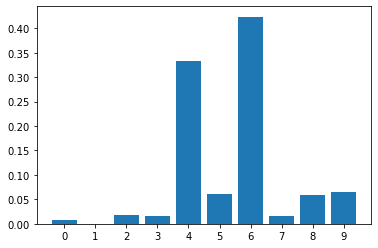

Norm_inf: 34.520196078431375; Result: False
Max value: 255.0
Min value: 0.0


In [1119]:
index = 0
x = np.expand_dims(X_test[correct_pred_idx].iloc[index, :], axis=0)
y = np.zeros(len(y_labels))

true_class = lg.predict(normalize(x))
y[true_class] = 1

show_adversarial_sample(x, y_labels, true_class=y, model=lg, attack_model=AttackFGSM, max_norm=0.07)

### Untargeted I-FGSM

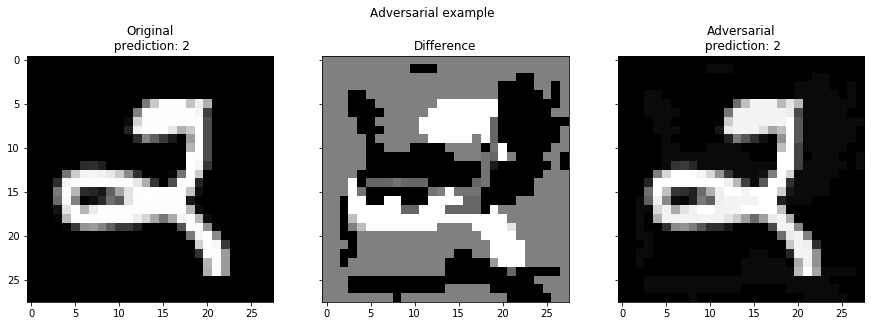

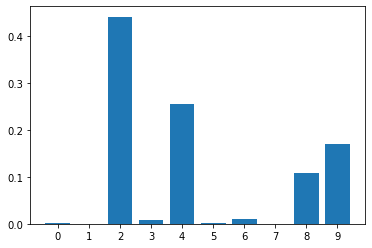

Norm_inf: 14.029019607843141; Result: False
Max value: 255.0
Min value: 0.0


In [1120]:
index = 1
x = np.expand_dims(X_test[correct_pred_idx].iloc[index, :], axis=0)
y = np.zeros(len(y_labels))

true_class = lg.predict(normalize(x))
y[true_class] = 1

show_adversarial_sample(x, y_labels, true_class=y, model=lg, attack_model=AttackIFGSM, max_norm=0.04, max_iters=100)

### DeepFool

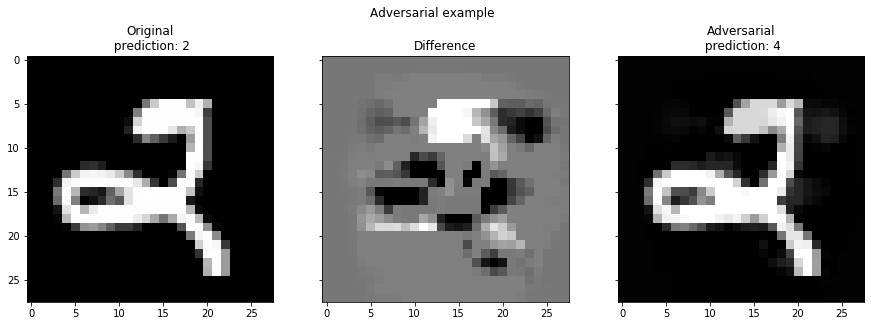

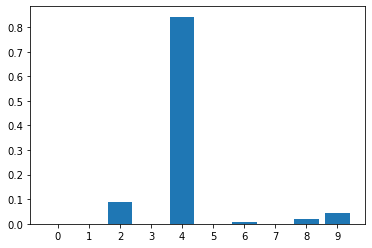

Norm_inf: 20.89611539222279; Result: True
Max value: 255.0
Min value: 0.0


In [1121]:
index = 1
x = np.expand_dims(X_test[correct_pred_idx].iloc[index, :], axis=0)
y = np.zeros(len(y_labels))

true_class = lg.predict(normalize(x))
y[true_class] = 1

show_adversarial_sample(x, y_labels, true_class=y, model=lg, attack_model=AttackDeepFool, max_norm=0.15, max_iters=12)

### Targeted I-FGSM

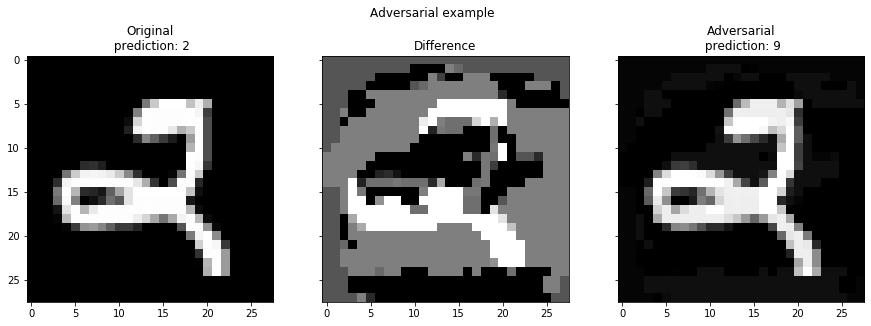

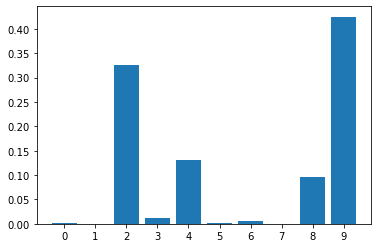

Norm_inf: 22.00627450980393; Result: True
Max value: 255.0
Min value: 0.0


In [1122]:
index = 1
x = np.expand_dims(X_test[correct_pred_idx].iloc[index, :], axis=0)
y = np.zeros(len(y_labels))
y[9] = 1

show_adversarial_sample(x, y_labels, true_class=y, model=lg, attack_model=AttackTIFGSM, max_norm=0.2, max_iters=5000)

### Untargeted MI-FGSM

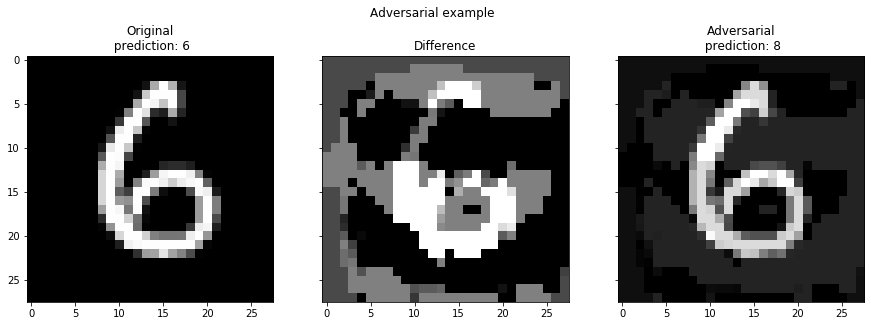

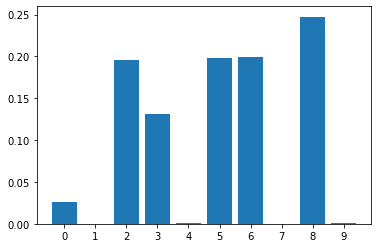

Norm_inf: 67.80137254901962; Result: True
Max value: 255.0
Min value: 0.0


In [1123]:
index = 123
x = np.expand_dims(X_test[correct_pred_idx].iloc[index, :], axis=0)
y = np.zeros(len(y_labels))

true_class = lg.predict(normalize(x))
y[true_class] = 1

show_adversarial_sample(x, y_labels, true_class=y, model=lg, attack_model=AttackMIFGSM, max_norm=1, max_iters=5000)

In [1124]:
y_real = np.array(y_test.iloc[:, 0])

comp = pd.DataFrame({"y_pred": y_pred, "y_real": y_real})
print(comp.head(20))

    y_pred  y_real
0        6       6
1        2       2
2        4       4
3        2       2
4        6       6
5        0       0
6        7       3
7        1       1
8        6       6
9        2       2
10       1       1
11       0       0
12       8       5
13       8       3
14       2       2
15       2       2
16       5       5
17       2       2
18       9       9
19       4       7


In [1125]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
r2 = r2_score(y_real, y_pred)
accuracy = int(sum(y_real == y_pred) / len(y_pred) * 100)

print(f'Coefficient of determination: {r2}')
print(f"Accuracy: {accuracy}%")

Coefficient of determination: 0.6861867327471952
Accuracy: 85%


In [1126]:
# import numpy as np
# import matplotlib.pyplot as plt


# # Example data
# t = np.arange(0.0, 1.0 + 0.01, 0.01)
# s = np.cos(4 * np.pi * t) + 2

# plt.rc('text', usetex=True)
# plt.rc('font', family='serif')
# plt.plot(t, s)

# plt.xlabel(r'\textbf{time} (s)')
# plt.ylabel(r'\textit{voltage} (mV)',fontsize=16)
# plt.title(r"\TeX\ is Number "
#           r"$\displaystyle\sum_{n=1}^\infty\frac{-e^{i\pi}}{2^n}$!",
#           fontsize=16, color='gray')
# # Make room for the ridiculously large title.
# plt.subplots_adjust(top=0.8)

# # plt.savefig('tex_demo')
# # plt.show()